<a href="https://colab.research.google.com/github/chawadesu/HandsOnDL/blob/main/stock_market_analysis_and_time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [ ]:
df1 = pd.read_csv("tsla.us.txt")
df1.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [ ]:
print(df1.head())
print(df1.shape)
print(df1.columns)

         Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0
(1858, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


In [ ]:
df1['Date'][1857]

'2017-11-10'

In [ ]:
df1.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [ ]:
df1.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [ ]:
# parse object to datetime
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y%m%d',infer_datetime_format=True)
df= df1.set_index('Date')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1858 entries, 2010-06-28 to 2017-11-10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     1858 non-null   float64
 1   High     1858 non-null   float64
 2   Low      1858 non-null   float64
 3   Close    1858 non-null   float64
 4   Volume   1858 non-null   int64  
 5   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 101.6 KB


<Figure size 864x504 with 0 Axes>

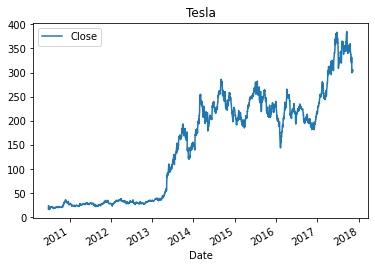

In [ ]:
plt.figure(figsize=(12,7))
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

<Figure size 864x504 with 0 Axes>

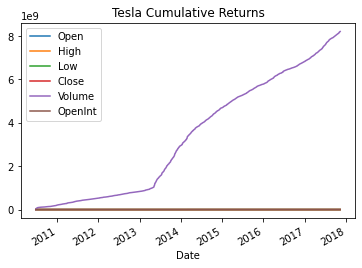

In [ ]:
# Comulative Return
plt.figure(figsize=(12,7))
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

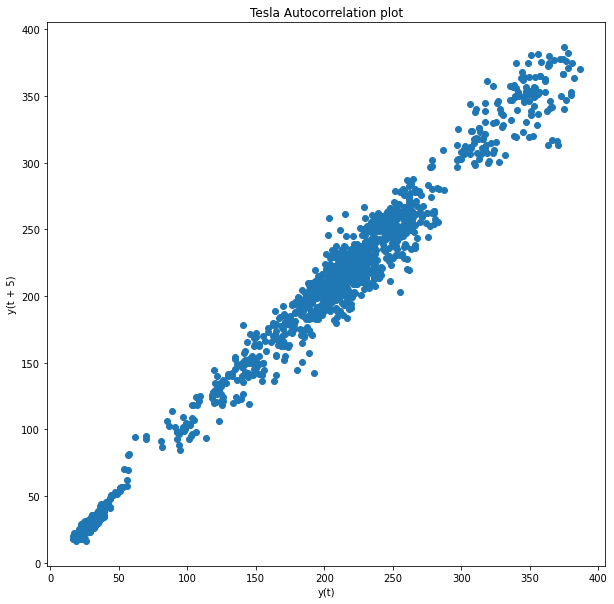

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

Moving Average

In [ ]:
ma_day = [14, 21]

In [ ]:
for ma in ma_day:
  column_name = f"MA for {ma} days"
  df[column_name] = df['Close'].rolling(ma).mean()

In [ ]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'MA for 14 days',
       'MA for 21 days'],
      dtype='object')


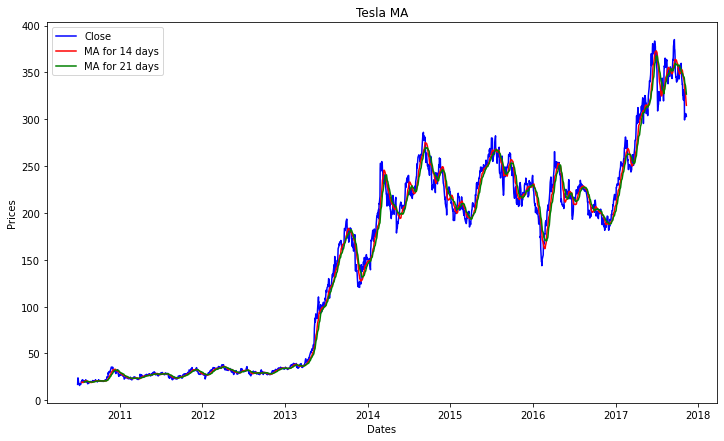

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Tesla MA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Close')
plt.plot(df['MA for 14 days'], 'red', label='MA for 14 days')
plt.plot(df['MA for 21 days'], 'green', label='MA for 21 days')
plt.legend()

ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

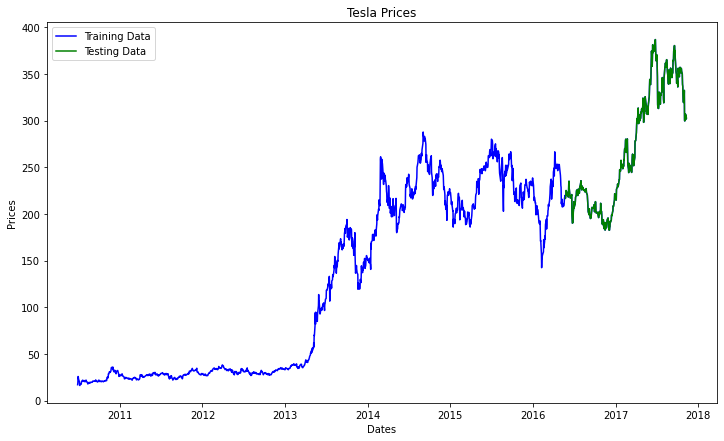

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 40.550
Symmetric mean absolute percentage error: 26.015


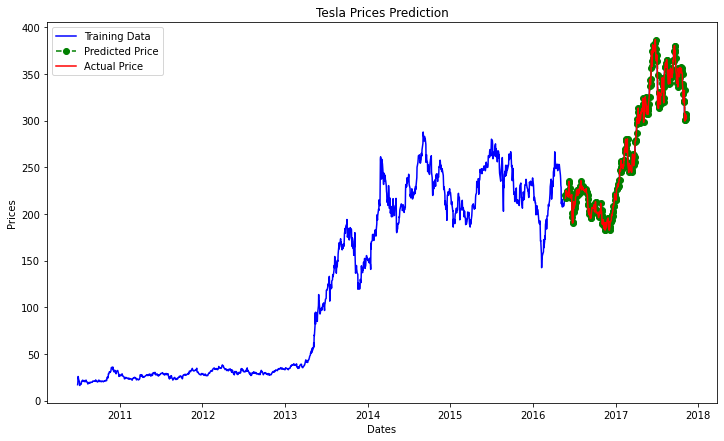

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

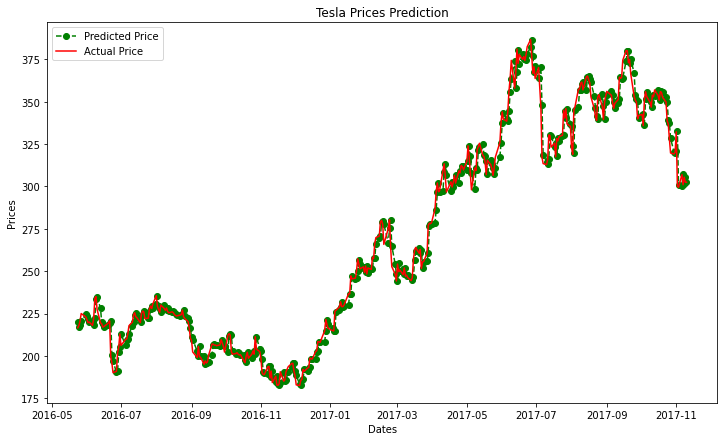

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
#plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

Daily Return of the Stock on Average

In [ ]:
df['Daily Return'] = df['Close'].pct_change()

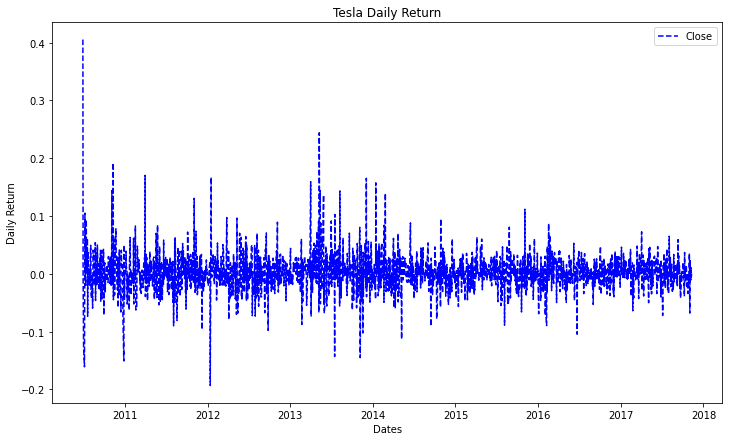

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Tesla Daily Return')
plt.xlabel('Dates')
plt.ylabel('Daily Return')
plt.plot(df['Daily Return'], color = 'blue',linestyle='dashed', label='Close')

plt.legend()

Predicting the closing price stock price

In [ ]:
df

,Open,High,Low,Close,Volume,OpenInt,MA for 14 days,MA for 21 days,Daily Return
Date,,,,,,,,,
2010-06-28,17.00,17.00,17.00,17.00,0,0,NaN,NaN,NaN
2010-06-29,19.00,25.00,17.54,23.89,18783276,0,NaN,NaN,0.405294
2010-06-30,25.79,30.42,23.30,23.83,17194394,0,NaN,NaN,-0.002512
2010-07-01,25.00,25.92,20.27,21.96,8229863,0,NaN,NaN,-0.078473
2010-07-02,23.00,23.10,18.71,19.20,5141807,0,NaN,NaN,-0.125683
...,...,...,...,...,...,...,...,...,...
2017-11-06,307.00,307.50,299.01,302.78,6482486,0,327.472857,335.969048,-0.010814
2017-11-07,301.02,306.50,300.03,306.05,5286320,0,323.644286,334.212381,0.010800
2017-11-08,305.50,306.89,301.30,304.31,4725510,0,320.251429,331.770476,-0.005685


In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1487

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00325027],
       [0.02191224],
       [0.02174973],
       ...,
       [0.78144637],
       [0.77787107],
       [0.77787107]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00325027, 0.02191224, 0.02174973, 0.01668472, 0.0092091 ,
       0.00083965, 0.        , 0.00449621, 0.00433369, 0.0033857 ,
       0.00633803, 0.01094258, 0.01107801, 0.01310943, 0.0165493 ,
       0.01218852, 0.01197183, 0.01408451, 0.01486999, 0.01394908,
       0.01286566, 0.01332611, 0.01232394, 0.01121343, 0.01386782,
       0.01665764, 0.01478873, 0.0125948 , 0.01026544, 0.01029252,
       0.00874865, 0.00568797, 0.00487541, 0.00682557, 0.00807151,
       0.00907367, 0.00804442, 0.00809859, 0.00893824, 0.01172806,
       0.0092091 , 0.01110509, 0.01069881, 0.01056338, 0.01102384,
       0.0099675 , 0.0125948 , 0.01424702, 0.01421993, 0.01283857,
       0.01381365, 0.01329902, 0.0118364 , 0.01332611, 0.01440953,
       0.01673889, 0.01392199, 0.01199892, 0.01421993, 0.01346154])]
[0.011023835319609966]

[array([0.00325027, 0.02191224, 0.02174973, 0.01668472, 0.0092091 ,
       0.00083965, 0.        , 0.00449621, 0.00433369, 0.0033857 ,
       0.00633803, 0.01094258, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1427/1427 [==============================] - 48s 32ms/step - loss: 0.0069


In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

29.188855249164543

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


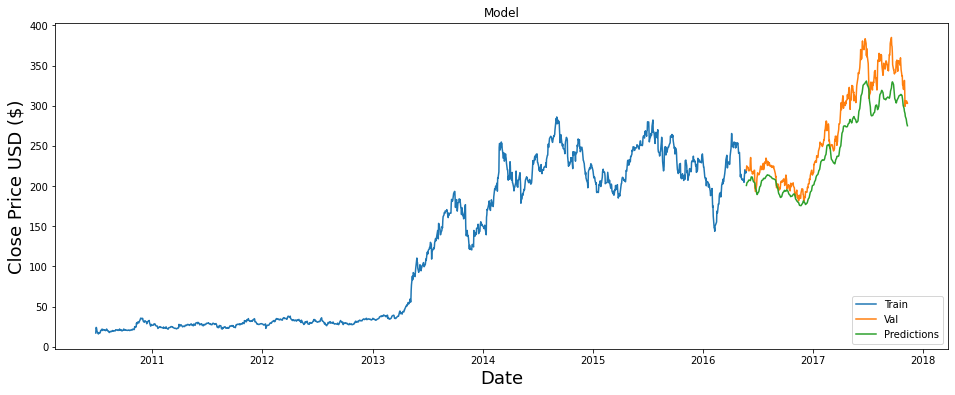

In [ ]:
import matplotlib.dates as mdates


# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')


plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2016-05-25,219.58,200.745987
2016-05-26,225.12,202.272141
2016-05-27,223.04,204.168243
2016-05-31,223.23,205.755676
2016-06-01,219.56,206.996262
...,...,...
2017-11-06,302.78,283.449249
2017-11-07,306.05,280.308228
2017-11-08,304.31,278.069641
